## 한글 자연어 처리 기초
* Kkma 패키지와 hannanum 패키지, twitter 패키지를 이용해 분석해보자!

In [3]:
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
kkma = Kkma()
hannanum = Hannanum()

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [6]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [7]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [8]:
from konlpy.tag import Twitter
t = Twitter()
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['한국어', '분석', '시작']

In [9]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [10]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

# 워드크라우드 해보기

* 필요한 모듈 import

In [11]:
import folium
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import json
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')

import pandas_datareader.data as web
from fbprophet import Prophet
from datetime import datetime
from pandas_datareader import data

Importing plotly failed. Interactive plots will not work.


## 워드크라우딩 할 txt 와, mask할 png 파일 불러오기

In [12]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [13]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))
stopwords_ = set(STOPWORDS)
stopwords_.add("said")
stopwords_.add('said Alice')
stopwords_.add('the')

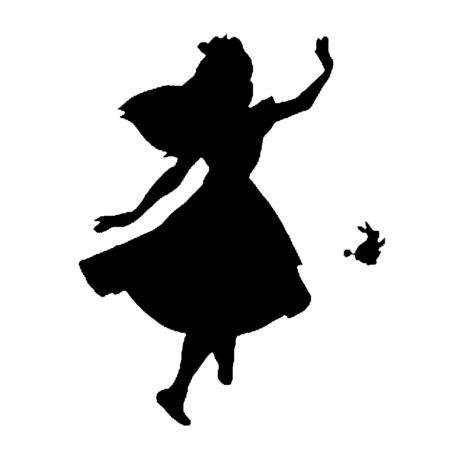

In [14]:
plt.figure(figsize = (8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### - 문서 자체에서 단어를 카운트 하는 기능 - 워드클라우드에서 제공

In [15]:
wc = WordCloud(background_color='white', max_words=2000, mask = alice_mask,stopwords = stopwords_)
wc = wc.generate(text)
wc.words_.pop('said Alice')
wc.words_

{'Alice': 1.0,
 'little': 0.4619289340101523,
 'the Queen': 0.36548223350253806,
 'one': 0.3197969543147208,
 'the King': 0.3147208121827411,
 'thing': 0.29949238578680204,
 'now': 0.28426395939086296,
 'Mock Turtle': 0.28426395939086296,
 'the Mock': 0.26903553299492383,
 'the Gryphon': 0.26903553299492383,
 'time': 0.2639593908629442,
 'quite': 0.2639593908629442,
 'the Hatter': 0.2639593908629442,
 'way': 0.25888324873096447,
 'think': 0.2436548223350254,
 'went on': 0.2436548223350254,
 'you know': 0.22842639593908629,
 'first': 0.2182741116751269,
 'come': 0.2182741116751269,
 'voice': 0.2131979695431472,
 'the Duchess': 0.20812182741116753,
 'Why': 0.20304568527918782,
 'never': 0.19289340101522842,
 "I'm": 0.18781725888324874,
 'tone': 0.18781725888324874,
 'came': 0.17766497461928935,
 'the Dormouse': 0.17766497461928935,
 'nothing': 0.17258883248730963,
 'day': 0.16751269035532995,
 'large': 0.16751269035532995,
 'well': 0.16243654822335024,
 'got': 0.16243654822335024,
 'long

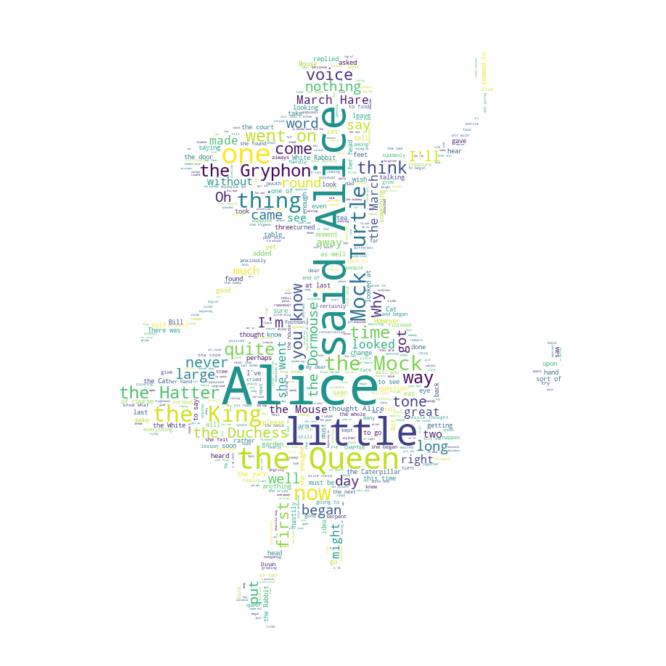

In [16]:
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## ironman-masking, ironman_script

In [17]:
import random
def grey_color_func(word, font_size, position, orientation, random_state = None,
                   **kwargs):
                    return 'hsl(0,0%%,%d%%)' % random.randint(60,150)

In [59]:
text = open('../data/ironman_script.txt').read()
ironman_mask = np.array(Image.open(
    '../data/Tony-Stark-Iron-Man-Marvel-movies-Robert-Downey-Jr-h.png'))
stopwords = set(STOPWORDS)
stopwords.add("I'm")

# -> 현재 stopwords 가 먹히지 않기 때문에 방법 찾을 필요

In [62]:
wc = WordCloud( max_words=3000, mask = ironman_mask,
                stopwords= stopwords, colormap = "Reds").generate(text)
wc.words_

{'Okay': 1.0,
 "I'm": 0.873015873015873,
 'No': 0.8095238095238095,
 'Tony': 0.6984126984126984,
 'got': 0.6349206349206349,
 'going to': 0.6349206349206349,
 'Yeah': 0.5714285714285714,
 'sir': 0.5555555555555556,
 'one': 0.5079365079365079,
 'see': 0.49206349206349204,
 'right': 0.47619047619047616,
 'need': 0.47619047619047616,
 'think': 0.4603174603174603,
 'Hey': 0.4126984126984127,
 'weapon': 0.4126984126984127,
 'want': 0.3968253968253968,
 'Well': 0.38095238095238093,
 'take': 0.36507936507936506,
 'thing': 0.36507936507936506,
 'Good': 0.3492063492063492,
 'now': 0.3333333333333333,
 'great': 0.3333333333333333,
 'look': 0.3333333333333333,
 'back': 0.3333333333333333,
 'you know': 0.3333333333333333,
 'will': 0.31746031746031744,
 'Come on': 0.31746031746031744,
 'Yes': 0.30158730158730157,
 'time': 0.2857142857142857,
 'Let': 0.2857142857142857,
 'hi': 0.2857142857142857,
 'say': 0.2857142857142857,
 'All right': 0.2698412698412698,
 'Oh': 0.25396825396825395,
 "We're": 0.25

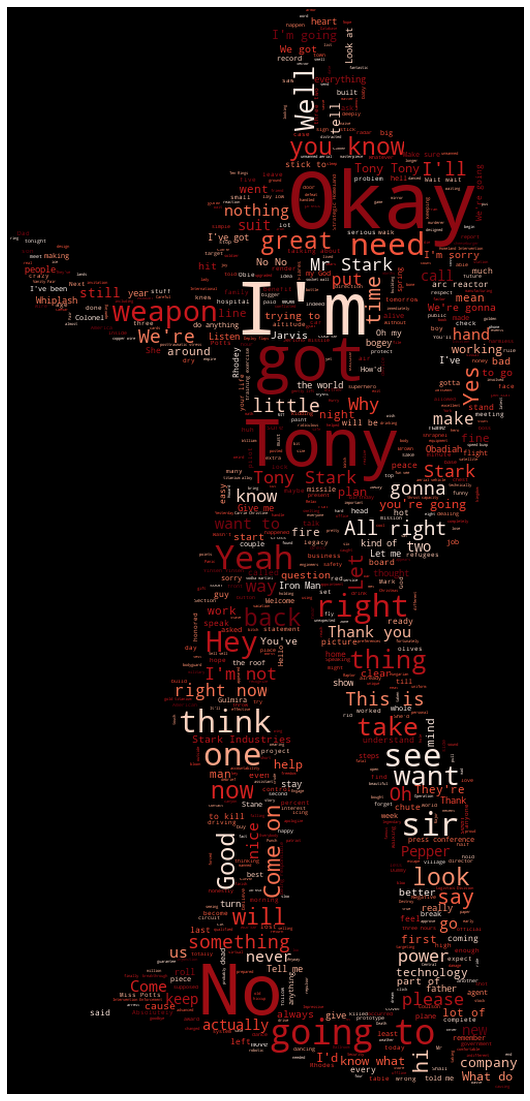

In [63]:
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()

In [21]:
text = open('../data/parasite_script.txt', 'rt', encoding='UTF8').read()
para_mask = np.array(Image.open('../data/parasite.png'))
stopwords = set(STOPWORDS)

In [22]:
wc = WordCloud( max_words=50000, mask = para_mask, 
                stopwords= stopwords, colormap = "winter").generate(text)

wc.words_

{'Ki Woo': 1.0,
 'He': 0.9302884615384616,
 'Ki Tek': 0.875,
 'YON KYO': 0.71875,
 'She': 0.6105769230769231,
 'Ki Jung': 0.6009615384615384,
 'Chung Sook': 0.5649038461538461,
 'Mun Kwang': 0.46634615384615385,
 'Dong Ik': 0.4014423076923077,
 'hi': 0.38461538461538464,
 'We': 0.2980769230769231,
 'Kun Sae': 0.2764423076923077,
 'Da Song': 0.27403846153846156,
 'Da Hae': 0.2548076923076923,
 'What': 0.21875,
 'They': 0.18509615384615385,
 'INT MANSION': 0.18028846153846154,
 'No': 0.15384615384615385,
 'see': 0.15144230769230768,
 'back': 0.15144230769230768,
 'living room': 0.14423076923076922,
 'look': 0.14182692307692307,
 'one': 0.1346153846153846,
 'come': 0.12740384615384615,
 'right': 0.12259615384615384,
 'face': 0.10817307692307693,
 'Min Hyuk': 0.10817307692307693,
 'the stairs': 0.10817307692307693,
 'How': 0.10576923076923077,
 'don': 0.10576923076923077,
 'turn': 0.10096153846153846,
 'take': 0.0985576923076923,
 'the kitchen': 0.0985576923076923,
 'something': 0.09615384

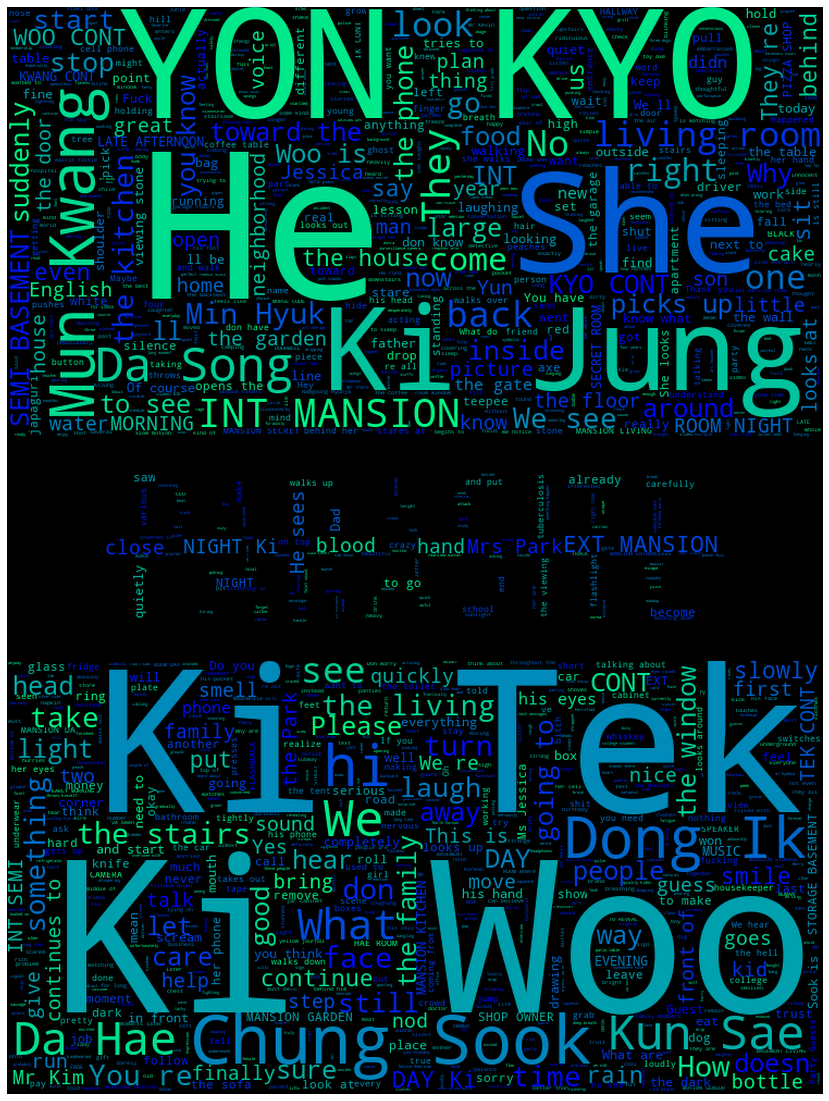

In [23]:
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()

# 육아 휴직관련 법안에 대한 분석

In [24]:
import nltk
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()
#KoNLPY의 내장 중,법률문서중 하나를 가지고 기초적인 분석을 해보는 튜토리얼, 육아휴직 관련 법안 제 1809890 호를 가져온다.

In [25]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [26]:
ko = nltk.Text(tokens_ko, name = '대한민국 국회 의안 제 1809890호')

In [27]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

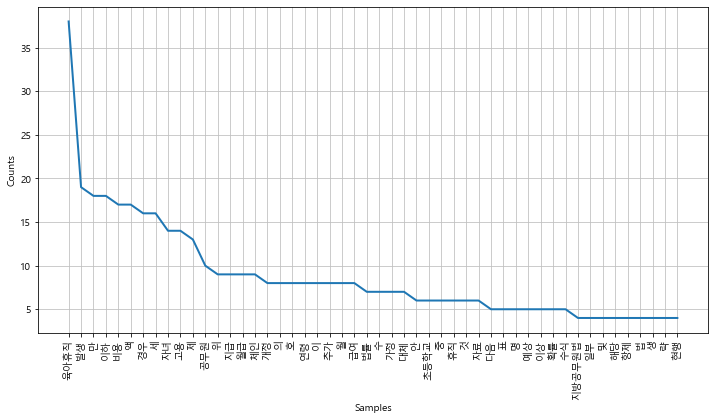

In [28]:
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

In [29]:
stop_words = ['.','(',')',',',"'",'%','-','X',').',
             'x','의','자','에','안','번',
             '호','을','이','다','만','로','가','를','것',
             '액', '세', '제','위','월','수','중', '표','법','생','략','정','명']
ko = (each_word for each_word in ko if each_word not in stop_words)


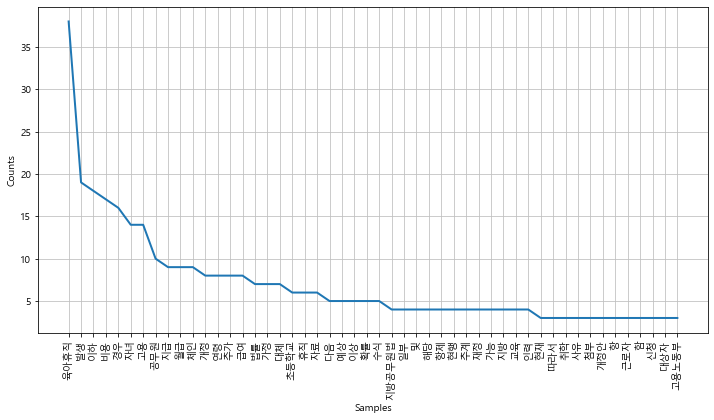

In [30]:
ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

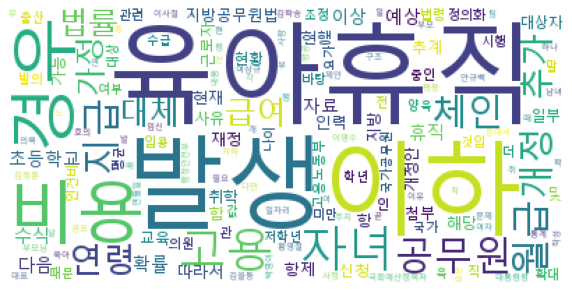

In [31]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.1,
                     background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Naive Bayes Classifier 의 이해 

In [32]:
from nltk.tokenize import word_tokenize
import nltk

In [33]:
train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [34]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [35]:
t = [({word : (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t
# 각 train 에 속한 문장과, 각 단어들이 속해있는지에 대한 결과를 True, False 로 넘겨준다.

[({'like': True,
   'i': True,
   'her': False,
   'you': True,
   'me': False,
   'hate': False},
  'pos'),
 ({'like': False,
   'i': True,
   'her': False,
   'you': True,
   'me': False,
   'hate': True},
  'neg'),
 ({'like': True,
   'i': False,
   'her': False,
   'you': True,
   'me': True,
   'hate': False},
  'neg'),
 ({'like': True,
   'i': True,
   'her': True,
   'you': False,
   'me': False,
   'hate': False},
  'pos')]

In [36]:
classfier = nltk.NaiveBayesClassifier.train(t)
classfier.show_most_informative_features()
#Naive 분류기 결과, hate라는 단어가 없을때(False), pos:neg라는 태그를 이용해서 분류한 결과 긍정:부정 비율이 1.7:1.0이다.
#이결과에 따르면, like라는 단어가 있을때 비율이 긍정 1.7:부정 1.0 임으로, 긍정일 확률이 더높다

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0


* 테스트 문장으로, 트레인을 기반으로 한 분류기 통과시켜보기

In [37]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                         (word in word_tokenize(test_sentence.lower()))
                         for word in all_words}
test_sent_features

{'like': True,
 'i': True,
 'her': False,
 'you': False,
 'me': False,
 'hate': False}

In [38]:
classfier.classify(test_sent_features)

'pos'

# Naive Bayes Classifier 의 이해 - 한글

In [39]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [40]:
train = [('메리가 좋아', 'pos'),
        ('고양이도 좋아', 'pos'),
        ('난 수업이 지루해', 'neg'),
        ('메리는 이쁜 고양이야', 'pos'),
        ('난 마치고 메리랑 놀거야', 'pos')]

## -영어에서 했듯 말뭉치를 만들면, 조사와 명사가 붙어서 나온다

In [41]:
all_words = set(word.lower() for sentence in train
                               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

## 이러한 말뭉치로 분류기를 돌리면, 동작의 장담이 어렵다.

In [42]:
t = [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                    for x in train]
classfier = nltk.NaiveBayesClassifier.train(t)
classfier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0


In [43]:
test_sentence = '난 수업이 마치면 고양이랑 놀거야'
test_sent_features = {word.lower():
                             (word in word_tokenize(test_sentence.lower()))
                             for word in all_words}
test_sent_features

{'메리가': False,
 '고양이야': False,
 '수업이': True,
 '놀거야': True,
 '고양이도': False,
 '좋아': False,
 '메리는': False,
 '이쁜': False,
 '마치고': False,
 '난': True,
 '메리랑': False,
 '지루해': False}

In [44]:
classfier.classify(test_sent_features)

'neg'

* 고양이랑 논다는대도 부정적이라는 분류결과가 나온다. 따라서 한글을 다룰땐, 형태소 분석이 필요하다.

In [45]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm = True, stem = True)]

## - 위의 tokenize 함수로, 각 형태소마다의 태그를 붙여준다.

In [46]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [47]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [48]:
def term_exists(doc):
    return {word : (word in set(doc)) for word in tokens}

In [49]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [50]:
classfier = nltk.NaiveBayesClassifier.train(train_xy)

## - 형태소 분석 전, 부정되었던 문장으로 다시 테스트 하기
### 형태소 분석 

In [51]:
test_sentence = [('난 수업이 마치면 고양이랑 놀거야')]
test_doc = pos_tagger.pos(test_sentence[0])
test_doc

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('고양이', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [52]:
test_sent_features = {word:(word in tokens) for word in test_doc}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('고양이', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [53]:
classfier.classify(test_sent_features)

'pos'

# 별개로 Twitter 옵션 써보기

In [54]:
from konlpy.tag import Twitter
twitter = Twitter()

print(twitter.pos('이것이 재밌습니까?ㅋㅋ'))

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('이', 'Determiner'), ('것', 'Noun'), ('이', 'Josa'), ('재밌습니까', 'Adjective'), ('?', 'Punctuation'), ('ㅋㅋ', 'KoreanParticle')]


In [55]:
print(twitter.pos('이것이 재밌습니깤ㅋㅋ', norm = True))
#norm은 현대적인말 그래욬ㅋㅋㅋ 같은 것을 그래요로 바꾸어 주는 것이다.


[('이', 'Determiner'), ('것', 'Noun'), ('이', 'Josa'), ('재밌습니까', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]


In [56]:
print(twitter.pos('이것이 재밌습깤ㅋㅋ', norm = True, stem = True))
# #stem은 그래요를 그렇다처럼 원형으로 바꾸어 주는 것이다.

[('이', 'Determiner'), ('것', 'Noun'), ('이', 'Josa'), ('재밌다', 'Adjective'), ('습', 'Noun'), ('끄다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [57]:
print(twitter.pos('이것도 재미 있습니당ㅋㅋ'))
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm = True))
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm = True, stem = True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있', 'Adjective'), ('습', 'Noun'), ('니당', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있습니다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]
